# ObsID : 0945070133, SRCNUM : 10, Instru : EPN
**Simbad :** Star (2MASS J03332989-2714334) https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4013058032&Name=2MASS%20J03332989-2714334&submit=submit

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


## Load files
Spectrum, Background, Response, Auxiliary response.

In [2]:
Spectrum(glob.glob('ObsID*_SRCNUM*_E*_spectrum_grp.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945070133_SRCNUM10_EPN_spectrum_grp.fits  Spectrum 1


Net count rate (cts/s) for Spectrum:1  9.166e-03 +/- 1.555e-03 (54.4 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-5
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7831 sec
 Using fit statistic: chi
 Using Background File                ObsID0945070133_SRCNUM10_EPN_background_spectrum.fits
  Background Exposure Time: 7832 sec
 Using Response (RMF) File            ObsID0945070133_SRCNUM10_EPN.rmf for Source 1
 Using Auxiliary Response (ARF) File  ObsID0945070133_SRCNUM10_EPN.arf



## Plot spectrum

In [3]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

(-0.5, 861.5, 662.5, -0.5)

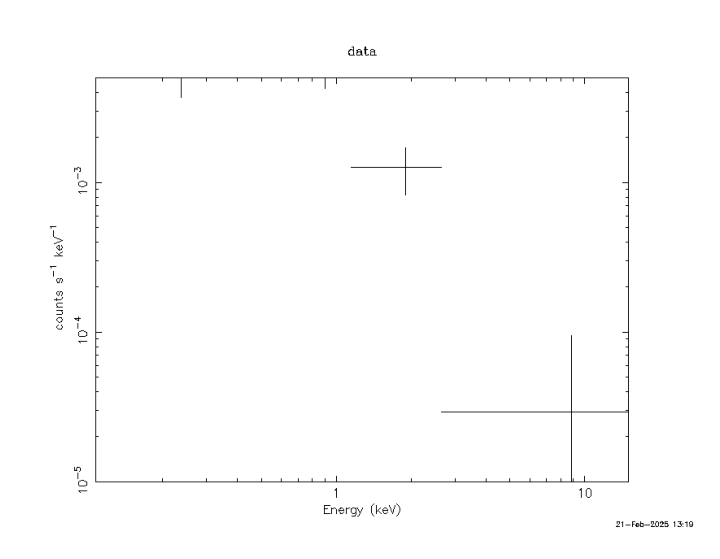

In [4]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model

In [5]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.571831e+12     using 5 bins.

Tes

(-0.5, 860.5, 661.5, -0.5)

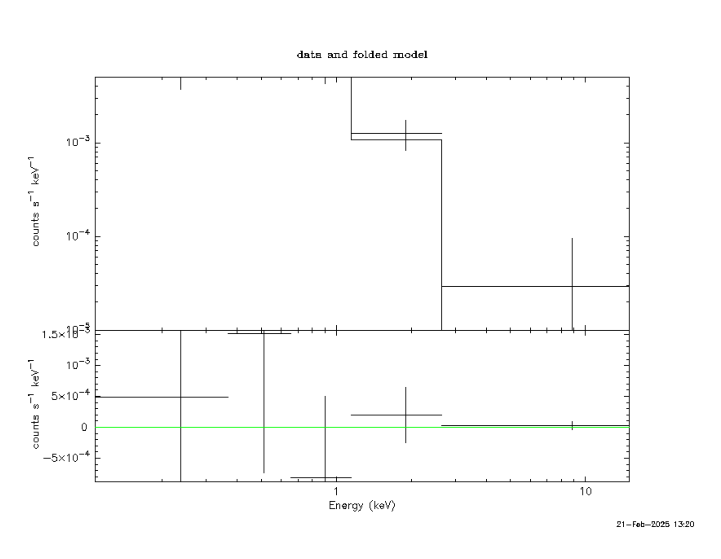

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model

In [7]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.951356e+10     using 5 bins.

Test statistic : Chi-Squared              4.951356e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
32.4314      1.00917      -2      0.141588       56.7933   5.78272e-06
28.927       308381       -1     0.0431660       19.3877   3.88373e-06
26.2247      616127       -2   0.000157335       6.48703   2.86235e-06
6.5

(-0.5, 859.5, 666.5, -0.5)

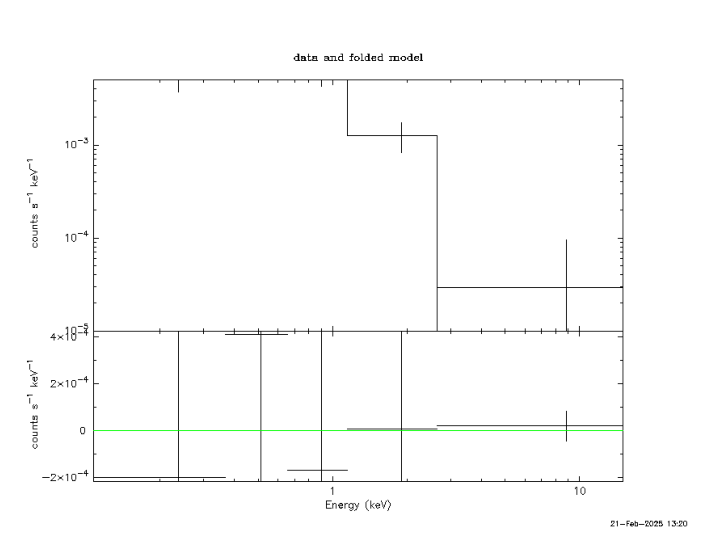

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model

In [10]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.772155e+09     using 5 bins.

Test statistic : Chi-Squared              8.772155e+09     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
21.4222      3.13269      -3      0.801877      0.531684   4.24486e-05
18.0117      50648.2 

(-0.5, 859.5, 661.5, -0.5)

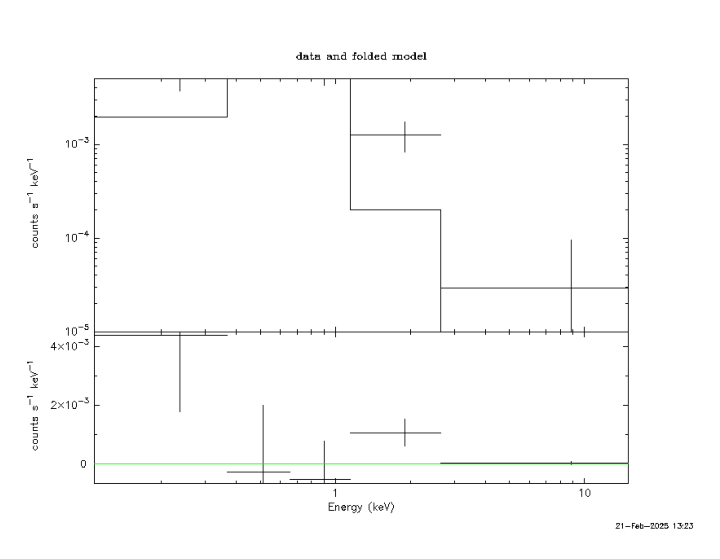

In [11]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model

In [12]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.230047e+11     using 5 bins.

Test statistic : Chi-Squared              3.230047e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
28.9245      1.1006        0      0.131689       1.21537   3.60987e-06
12.8344      517311       -1    0.00774763       1.76572   3.97972e-06
0.940988     881482       -2     0.0803896       2.89429   9.38119e-06
0

(-0.5, 860.5, 665.5, -0.5)

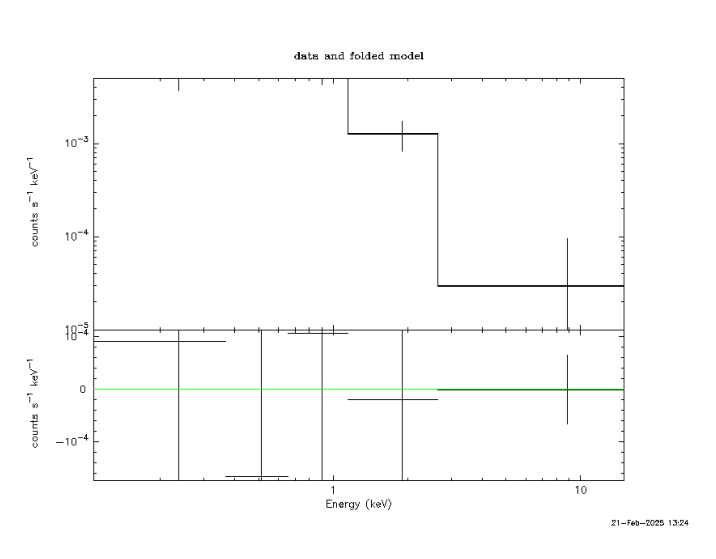

In [13]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_E*_Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Flux

In [14]:
AllModels.calcFlux(".2 12.0")

 Model Flux 2.2337e-05 photons (3.4033e-14 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [15]:
Flux = 3.4033e-14 # ergs/cm^2/s

### ESASky

https://sky.esa.int/esasky/?target=53.37579166666667%20-27.242833333333333&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``
- Stack Catalogue name : 4XMMs J033329.9-271434
- IAU name : 4XMM J033329.9-271433
- RA : 03h 33m 29.959s
- DEC : -27° 14' 34.10"

``GAIA``
- Designation : Gaia DR3 5060545834987968640
- RA : 03h 33m 29.937s
- DEC : -27° 14' 33.44"
- Parallax : 1.9836 mas

``2MASS``
- Name : 03332989-2714334
- RA : 03h 33m 29.898s
- DEC : -27° 14' 33.48"

### Luminosity

In [17]:
"""GAIA"""

P_mas = 1.9836 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity = 4*np.pi*Flux*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : {d_cm} cm")
print(f"Luminosité : {Luminosity} erg/s")

(GAIA)
Distance : 1.5556059689453518e+21 cm
Luminosité : 1.0349260044180192e+30 erg/s
